In [ ]:
print("Modelling-Pipeline-Optimization")

In [2]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [9]:
# Read ecoli dataset from the UCI ML Repository and store in
# dataframe df
df = read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)
print(df.head())

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


In [15]:
# The data matrix X
X = df.iloc[:,1:-1]
X

,1,2,3,4,5,6,7
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37


In [16]:
# The labels
y = (df.iloc[:,-1:])
y

,8
0,cp
1,cp
2,cp
3,cp
4,cp
...,...
331,pp
332,pp
333,pp
334,pp


In [18]:
# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [19]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=0)

In [20]:
print(X_train.shape)

(224, 7)


In [21]:
print(X_test.shape)

(112, 7)


In [22]:
print(y_train.shape)

(224,)


In [23]:
print(y_test.shape)

(112,)


In [25]:
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9017857142857143
Test set score: 0.8482142857142857


In [26]:
#pipeline setup

#Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance 
#using the StandardScaler().
#Feature selector: Use VarianceThreshold() for discarding features whose variance is less than a 
#certain defined threshold.
#Classifier: KNeighborsClassifier(), which implements the k-nearest neighbor classifier and 
#selects the class of the majority k points, which are closest to the test example

pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

In [27]:
pipe.fit(X_train, y_train)
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


In [ ]:
#Optimizing and Tuning the Pipeline

In [28]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
    Normalizer(), MaxAbsScaler()],
    'selector__threshold': [0, 0.001, 0.01],
    'classifier__n_neighbors': [1, 3, 5, 7, 10],
    'classifier__p': [1, 2],
    'classifier__leaf_size': [1, 5, 10, 15]
}

In [31]:
grid = GridSearchCV(pipe, parameters, cv=10).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

C:\Users\khura\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Training set score: 0.8883928571428571
Test set score: 0.8392857142857143


In [34]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 1, 'classifier__n_neighbors': 7, 'classifier__p': 1, 'scaler': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1))])


In [35]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


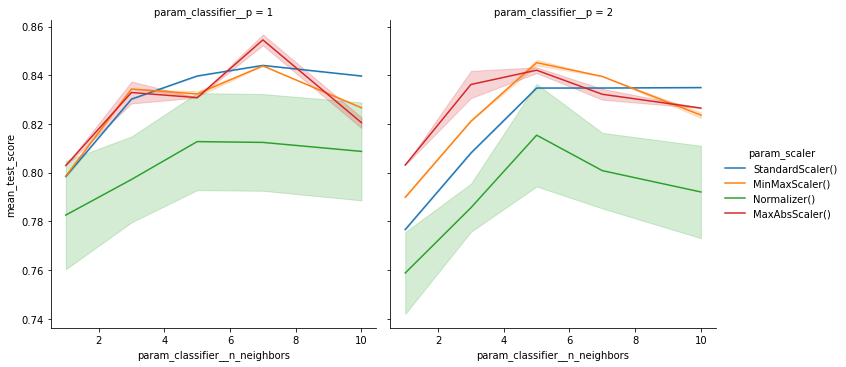

In [36]:
sns.relplot(data=result_df,
    kind='line',
    x='param_classifier__n_neighbors',
    y='mean_test_score',
    hue='param_scaler',
    col='param_classifier__p')
plt.show()

In [33]:
! git fetch
! git add Modelling-Pipeline-Optimization.ipynb
! git commit -m "New code push" Modelling-Pipeline-Optimization.ipynb
! git push origin

The file will have its original line endings in your working directory


[main 3b937d4] New code push
 1 file changed, 4 insertions(+), 4 deletions(-)


The file will have its original line endings in your working directory
To https://github.com/Ashishkhurana01/Modelling-Pipeline-Optimization.git
   25c214b..3b937d4  main -> main
